In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import numpy as np

In [40]:
centroids = [(-5,-5),(5,5),(-2.5,2.5)]
cluster_std = [1,1,1]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

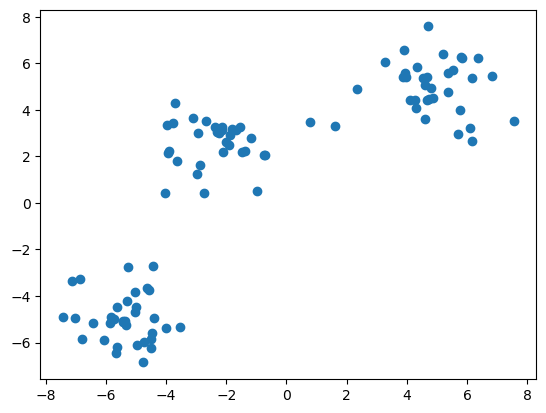

In [43]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        # Initialize centroids
        initial_centroids_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[initial_centroids_index]
        
        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break
        
        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
                 
        return np.array(cluster_group)
    
    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group==type].mean(axis=0))

        return np.array(new_centroids)


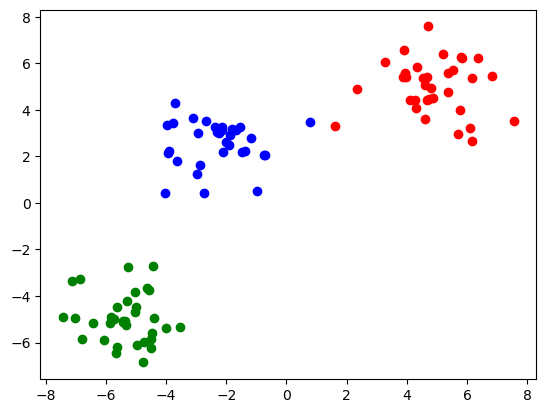

In [46]:
km = KMeans(n_clusters=3)
y_means = km.fit_predict(X)
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='blue')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='red')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='green')
plt.show()

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\100 Days of ML\Datasets\student_clustering.csv")
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


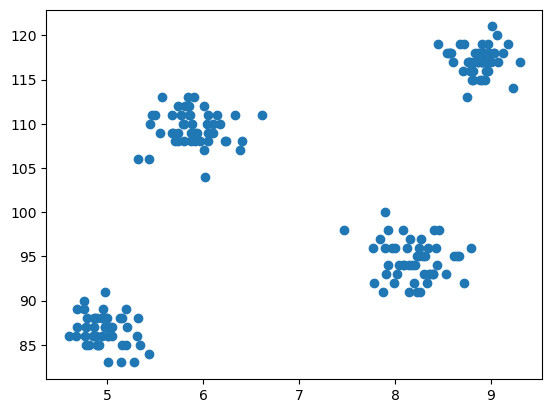

In [56]:
plt.scatter(df['cgpa'],df['iq'])

In [57]:
X = df.iloc[:,:].values

In [60]:
km = KMeans(n_clusters=4,max_iter=100)
y_means = km.fit_predict(X)

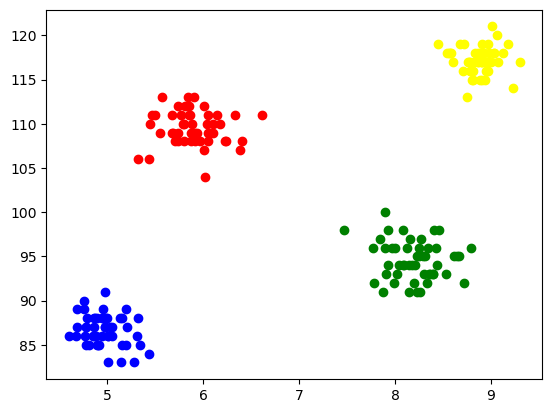

In [61]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()